In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 10s 5us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 3s 6us/step


In [5]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
# 모델 구성
from keras import models
from keras import layers

# 이전 장의 16차원의 공간은 46개의 클래스를 구분하기에 너무 제약이 많다. 
# 이렇게 규모가 작은 층은 유용한 정보를 완전히 잃게 되는 정보의 병목 지점처럼 동작할 수 있다. 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # 46개의 값을 모두 더하면 1이 된다.46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률이다.

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# 훈련 데이터에서 1,000개의 샘플을 따로 떼어서 검증 세트로 사용
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
history = model.fit(partial_x_train,
                            partial_y_train,
                            epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 235us/step - loss: 2.5316 - acc: 0.4955 - val_loss: 1.7202 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.4451 - acc: 0.6882 - val_loss: 1.3461 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 136us/step - loss: 1.0952 - acc: 0.7660 - val_loss: 1.1714 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 1s 134us/step - loss: 0.8699 - acc: 0.8158 - val_loss: 1.0782 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.7034 - acc: 0.8475 - val_loss: 0.9848 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.5666 - acc: 0.8791 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.4580 - acc: 0.9053 - val_loss: 0.9107 - val_acc: 0.8000


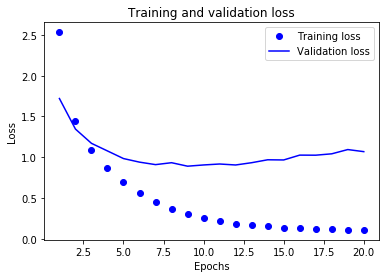

In [18]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

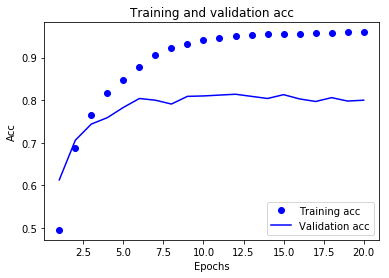

In [19]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [20]:
# 과적합에 대해 조정
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train,
                            partial_y_train,
                            epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 164us/step - loss: 2.5390 - acc: 0.5228 - val_loss: 1.6717 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 129us/step - loss: 1.3708 - acc: 0.7116 - val_loss: 1.2752 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 115us/step - loss: 1.0138 - acc: 0.7790 - val_loss: 1.1306 - val_acc: 0.7540
Epoch 4/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.7976 - acc: 0.8249 - val_loss: 1.0537 - val_acc: 0.7610
Epoch 5/9
7982/7982 [==============================] - 1s 111us/step - loss: 0.6392 - acc: 0.8628 - val_loss: 0.9762 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 129us/step - loss: 0.5113 - acc: 0.8921 - val_loss: 0.9103 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.4107 - acc: 0.9149 - val_loss: 0.8914 - val_acc: 0.8210
Epoch 8

In [21]:
results

[1.022944398151374, 0.7756010686194165]

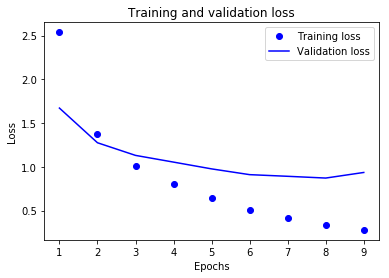

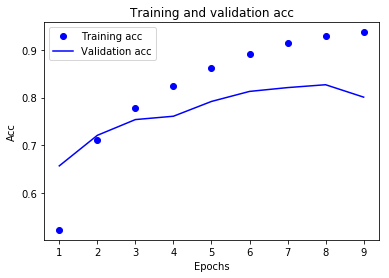

In [22]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [23]:
# 새로운 데이터에 대해 예측
predictions = model.predict(x_test)

In [25]:
predictions[0].shape

(46,)

In [27]:
np.sum(predictions[1])

1.0

In [28]:
# 가장 확률이 높은 클래스
np.argmax(predictions[0])

3

In [29]:
# 레이블과 손실을 다루는 다른 방법
# 레이블을 인코딩하는 다른 방법은 정수 텐서로 변환하는 것
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [30]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [ ]:
# 이방식을 사용하려면 손실 함수 하나만 바꾸면 된다.
# categorical_crossentropy는 레이블이 범주형 인코딩되어 있을 것이라고 기대한다.
# 정수 레이블을 사용할 때는 sparse_categorical_crossentropy를 사용해야 한다.
# 이 손실 함수는 인터페이스만 다를 뿐이고 수학적으로는 categorical_crossentropy는와 동일하다
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])